## 2021 Visualizations

This notebook produces visualizations for the ACS standard dataframes for cities of interest. 

### Read in Data

In [2]:
# import required libraries
import os
import sys
### add system path to get other library directories
sys.path[0] = os.path.join(os.path.abspath(''),'..')

import geopandas
import warnings
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import glob
from lib import visualizations as viz
warnings.filterwarnings('ignore')

In [3]:
## if file doesn't exist then unzip
if os.path.exists("/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"):
    ACS_2021_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"
else:
    with zipfile.ZipFile('/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/data/standard_dataframes/')
    ACS_2021_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"
    
if os.path.exists("/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"):
    ACS_2017_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"
else:
    with zipfile.ZipFile('/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/data/standard_dataframes/')
    ACS_2017_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"

In [4]:
# read in the files
acs_2017_standard_df = geopandas.read_file(ACS_2017_MERGED_FILE)
acs_2021_standard_df = geopandas.read_file(ACS_2021_MERGED_FILE)

### Check dimensions to see how many columns are in each dataframe

In [5]:
acs_2017_standard_df.shape

(12611, 250)

In [6]:
acs_2021_standard_df.shape

(13341, 251)

### Maps by City for 2017: "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"

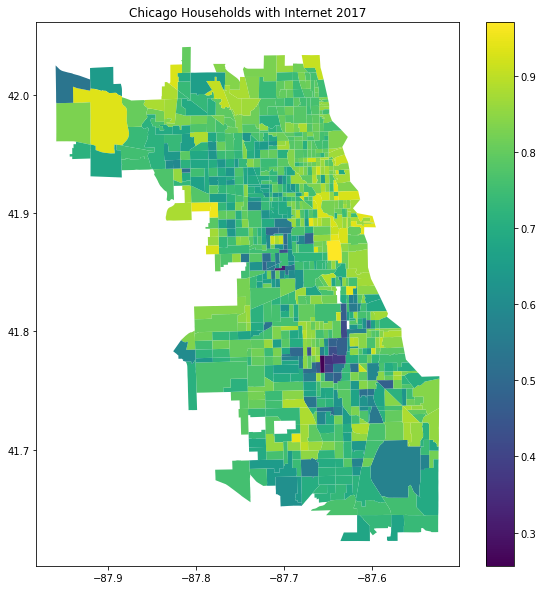

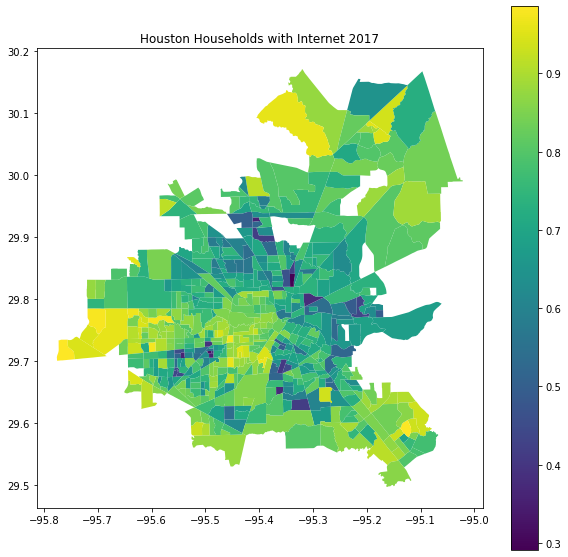

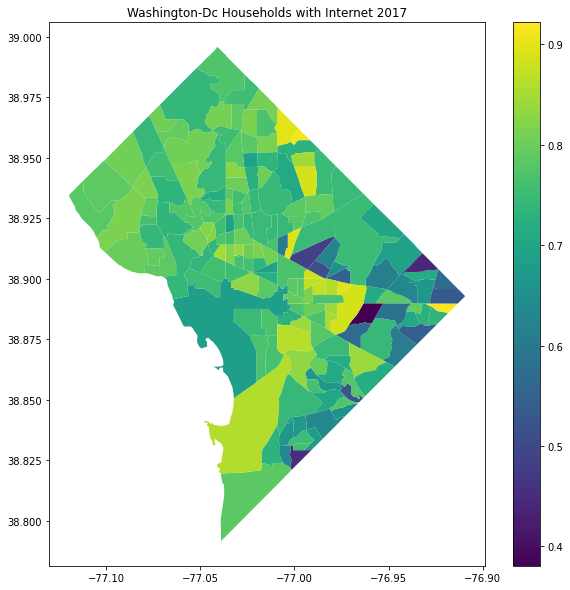

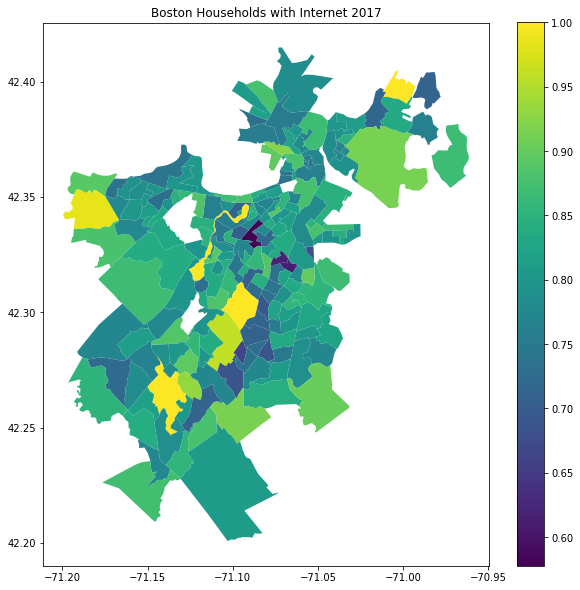

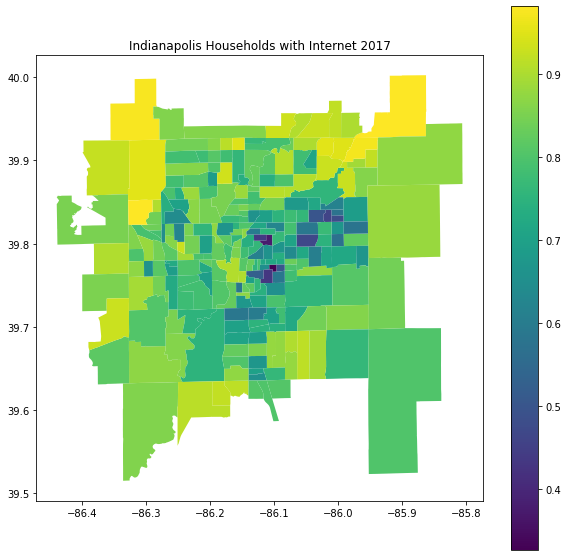

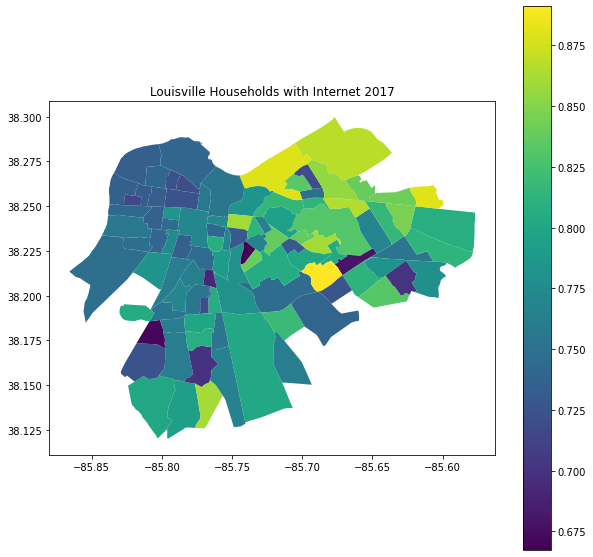

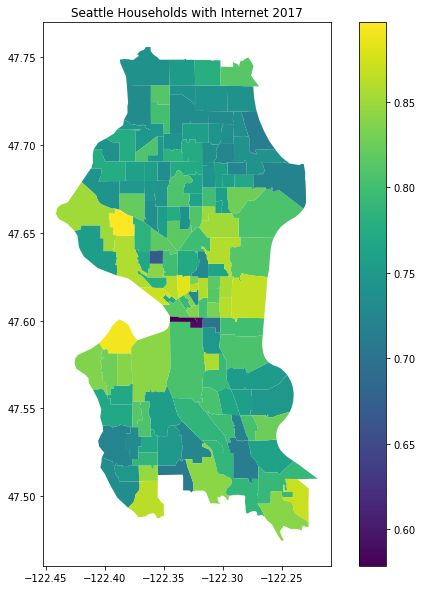

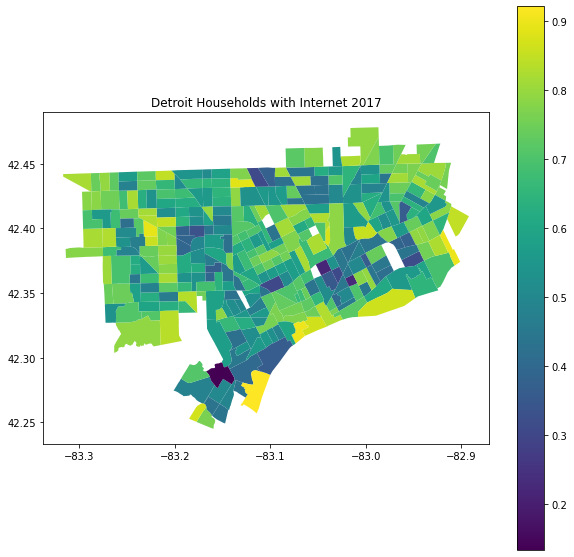

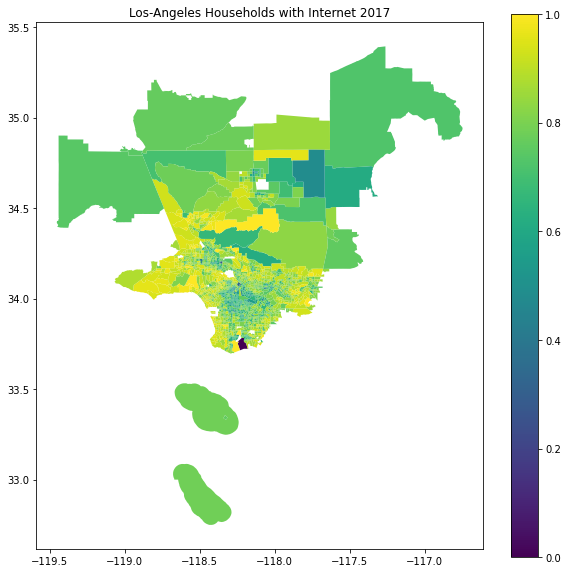

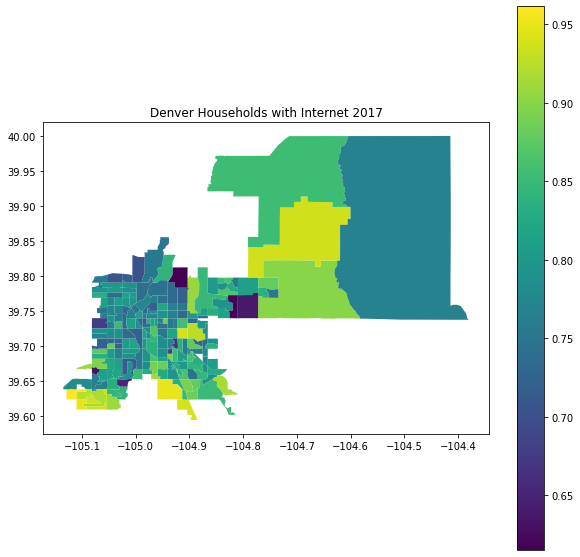

In [8]:
for city in set(acs_2017_standard_df['City']):
    city_df = acs_2017_standard_df[acs_2017_standard_df['City'] == city]
    city_df['int %'] = city_df["PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"]
    viz.simple_map(city_df.drop_duplicates(subset='tract'), 'int %', 
                  'tract', f'{city.title()} Households with Internet 2017', f"/tmp/visualizations/{city}-acs-internet-2017.png")

### Maps by City for 2021: "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"

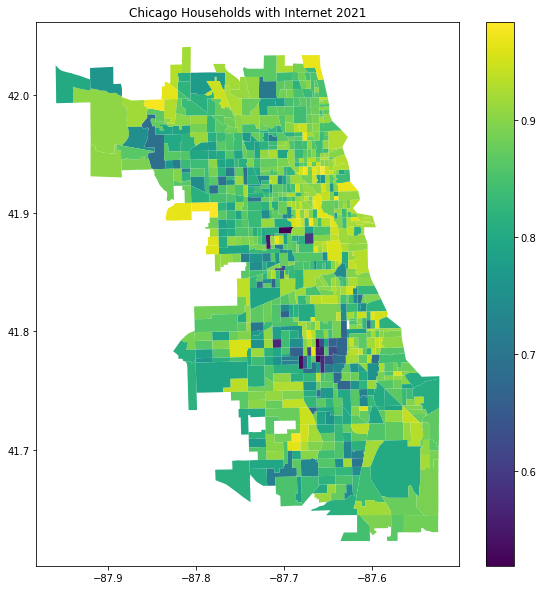

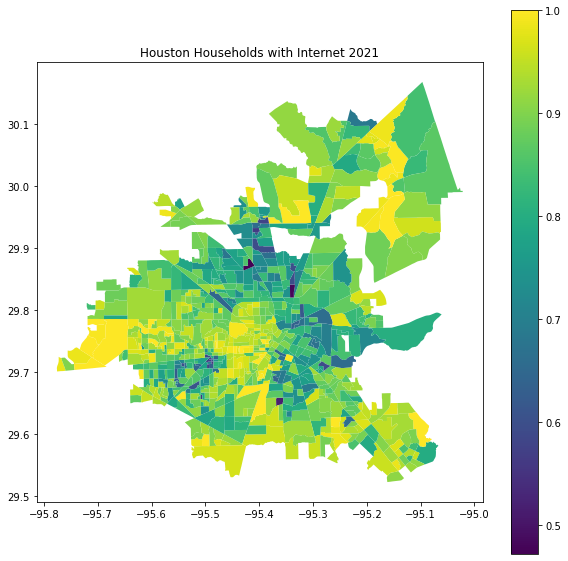

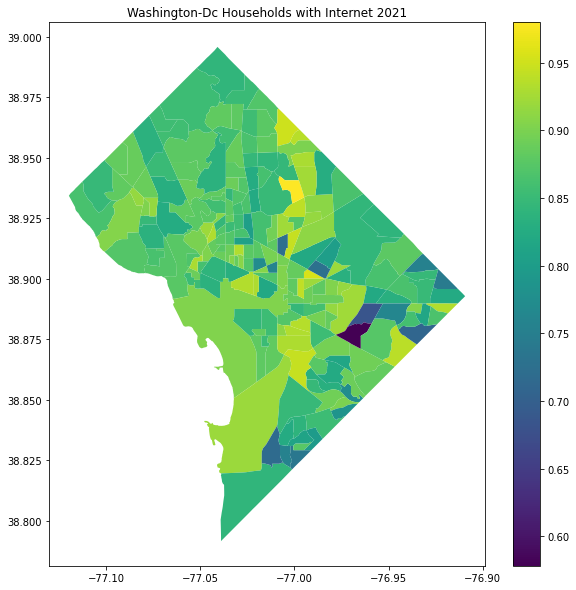

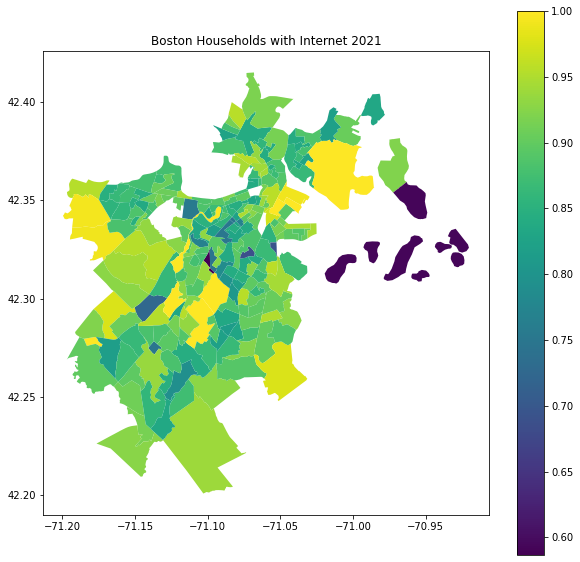

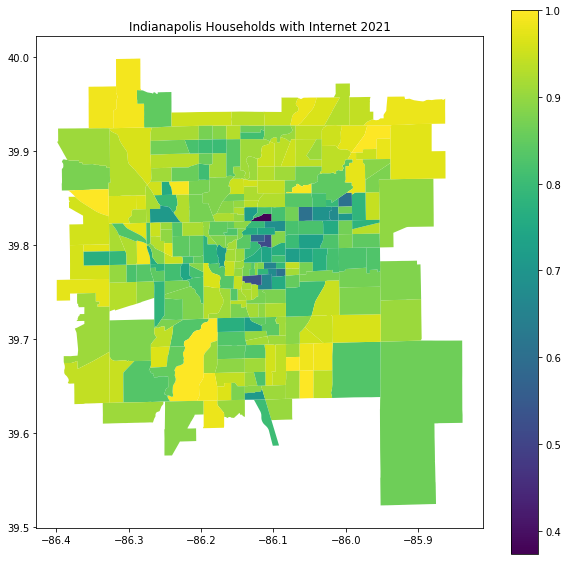

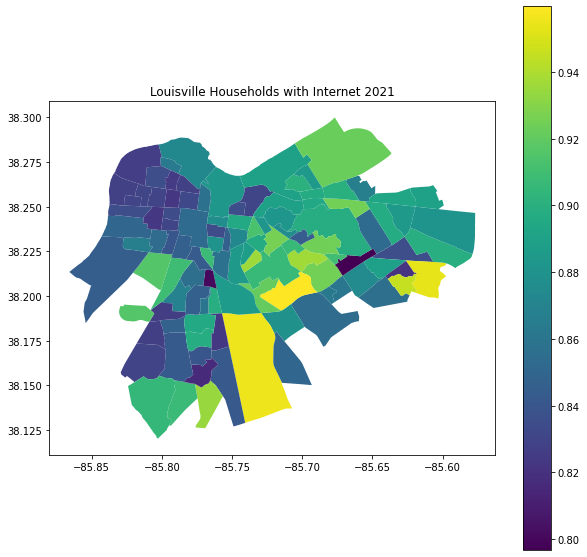

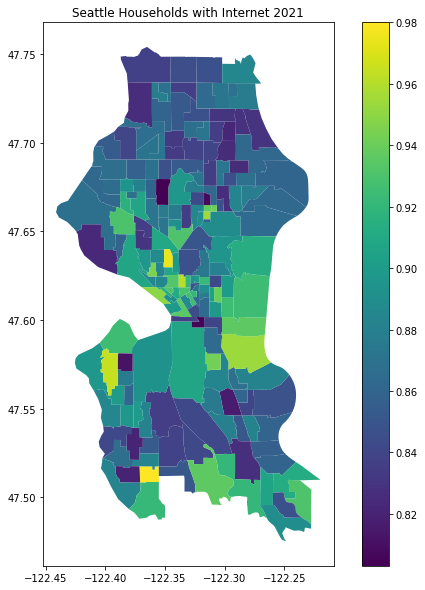

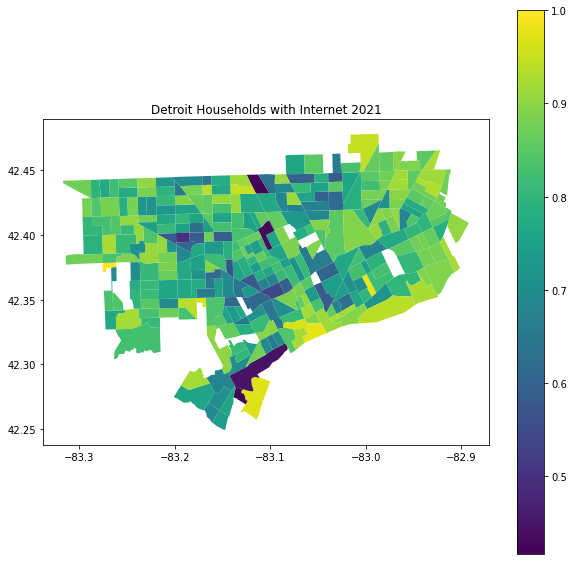

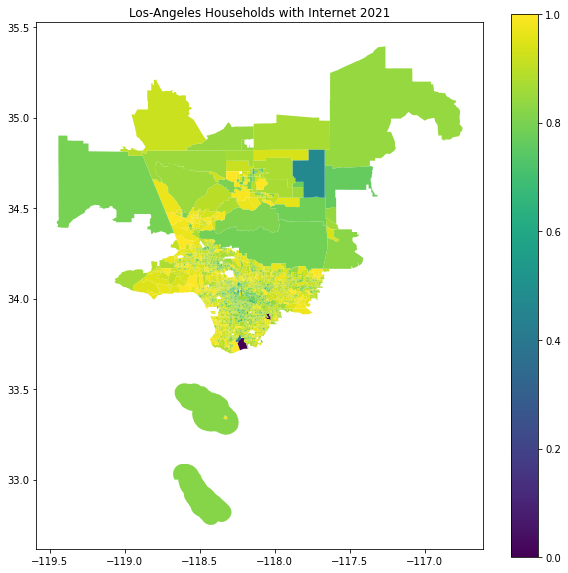

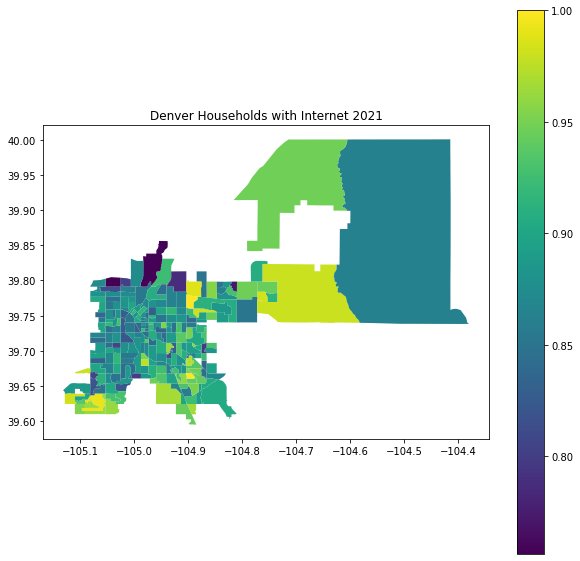

In [11]:
for city in set(acs_2021_standard_df['City']):
    city_df = acs_2021_standard_df[acs_2021_standard_df['City'] == city]
    viz.simple_map(city_df.drop_duplicates(subset='tract'), "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD", 
                  'tract', f'{city.title()} Households with Internet 2021', f"/tmp/visualizations/{city}-acs-internet-2017.png")

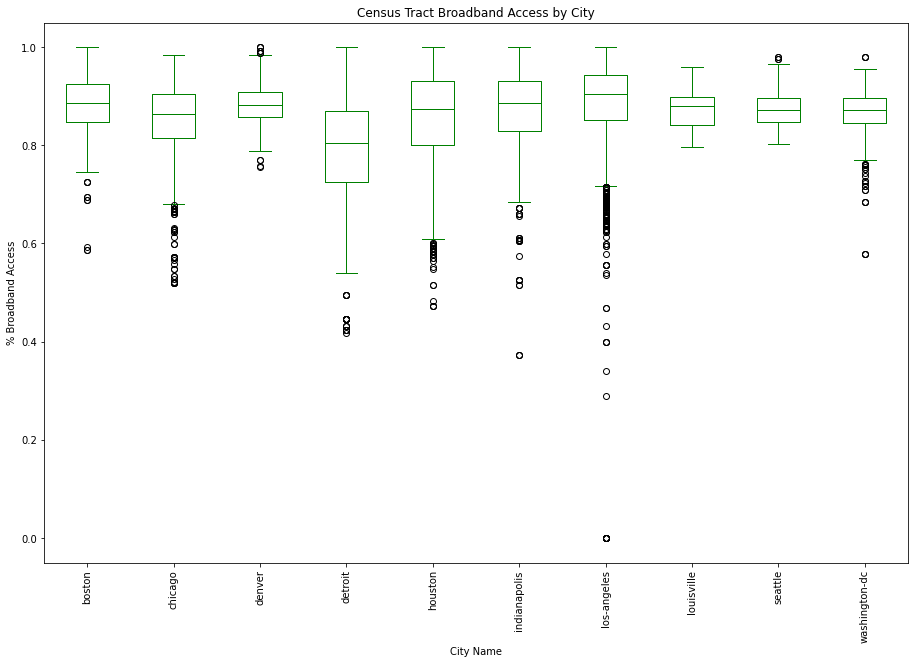

In [10]:
acs_2021_standard_df.boxplot(column='PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
                             by='City', rot=90, figsize=(15,10), grid=False,
                       fontsize=10, color='green')
plt.ylabel('% Broadband Access')
plt.xlabel('City Name')
plt.title('Census Tract Broadband Access by City')
plt.suptitle('');

In [48]:
for i in chicago_2021.columns:
    print(i)

City
tract
state
county
STATEFP
COUNTYFP
Estimate!!Total: TOTAL POPULATION
Estimate!!Total: SEX BY AGE
Estimate!!Total:!!Male: SEX BY AGE
Estimate!!Total:!!Male:!!Under 5 years SEX BY AGE
Estimate!!Total:!!Male:!!5 to 9 years SEX BY AGE
Estimate!!Total:!!Male:!!10 to 14 years SEX BY AGE
Estimate!!Total:!!Male:!!15 to 17 years SEX BY AGE
Estimate!!Total:!!Male:!!18 and 19 years SEX BY AGE
Estimate!!Total:!!Male:!!20 years SEX BY AGE
Estimate!!Total:!!Male:!!21 years SEX BY AGE
Estimate!!Total:!!Male:!!22 to 24 years SEX BY AGE
Estimate!!Total:!!Male:!!25 to 29 years SEX BY AGE
Estimate!!Total:!!Male:!!30 to 34 years SEX BY AGE
Estimate!!Total:!!Male:!!35 to 39 years SEX BY AGE
Estimate!!Total:!!Male:!!40 to 44 years SEX BY AGE
Estimate!!Total:!!Male:!!45 to 49 years SEX BY AGE
Estimate!!Total:!!Male:!!50 to 54 years SEX BY AGE
Estimate!!Total:!!Male:!!55 to 59 years SEX BY AGE
Estimate!!Total:!!Male:!!60 and 61 years SEX BY AGE
Estimate!!Total:!!Male:!!62 to 64 years SEX BY AGE
Estimate

In [94]:
chicago_2017 = acs_2017_standard_df[acs_2017_standard_df['City'] == 'chicago']

In [95]:
chicago_2021 = acs_2021_standard_df[acs_2021_standard_df['City'] == 'chicago']

In [93]:
chicago_income_df_2017 = chicago_2017[chicago_2017['Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)'] > 0]

In [147]:
chicago_rent_df_2021 = chicago_2021[chicago_2021['Estimate!!Median gross rent MEDIAN GROSS RENT (DOLLARS)'] > 0]

In [100]:
import seaborn as sns

In [130]:
health_ins = chicago_income_df_2021[['PERC Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE', 'PERC Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE']]

In [131]:
health_ins

,PERC Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE
405,0.471468,0.528532
406,0.494040,0.505960
407,0.516169,0.483831
408,0.477344,0.522656
409,0.493532,0.506468
...,...,...
2254,0.466785,0.533215
2255,0.467192,0.532808
2256,0.491460,0.508540
2257,0.493187,0.506813


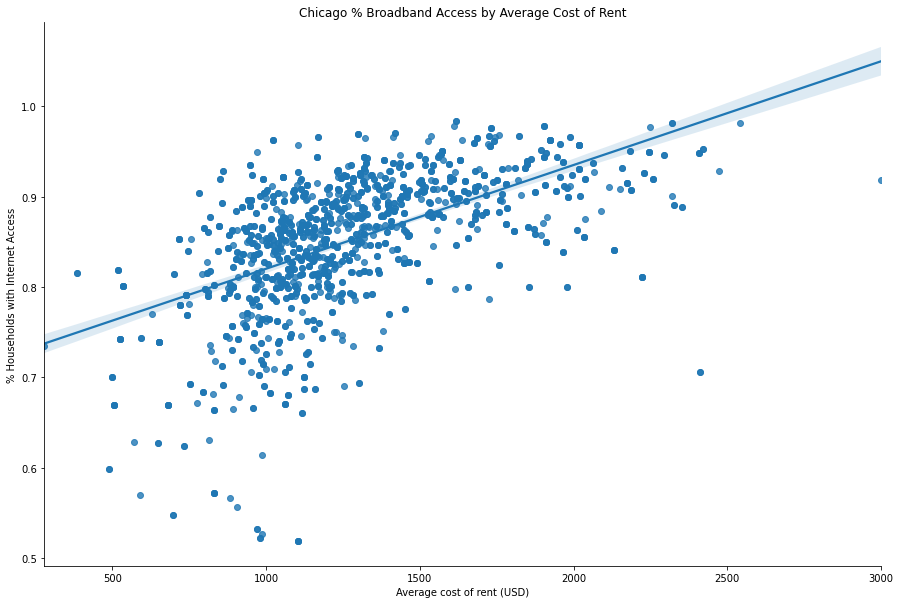

In [149]:
#create scatterplot with regression line
sns.regplot(chicago_rent_df_2021['Estimate!!Median gross rent MEDIAN GROSS RENT (DOLLARS)'],
            chicago_rent_df_2021["PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"])
plt.title("Chicago % Broadband Access by Average Cost of Rent")
plt.xlabel("Average cost of rent (USD)")
plt.ylabel("% Households with Internet Access")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

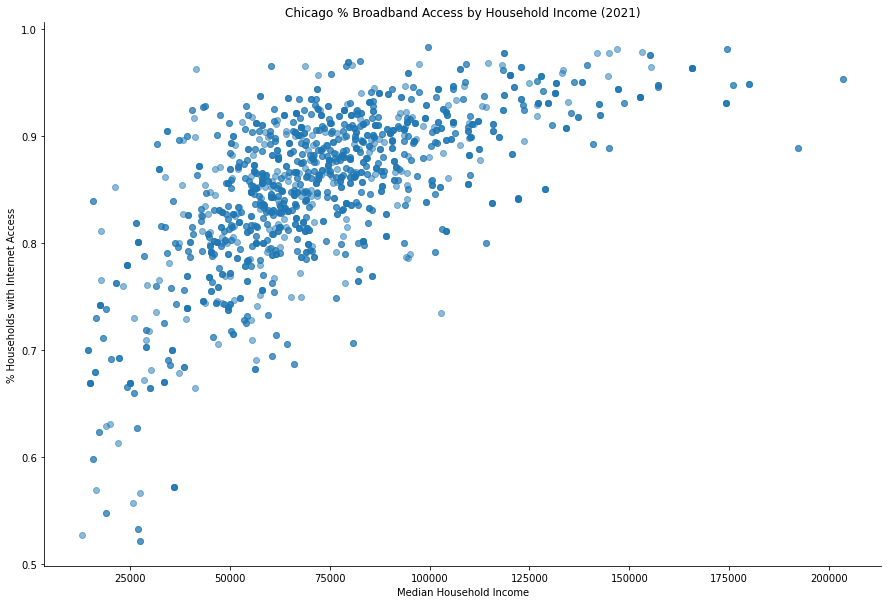

In [98]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.scatter(chicago_income_df_2021['Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)'],
            chicago_income_df_2021["PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"],
            alpha=0.5)
plt.title("Chicago % Broadband Access by Household Income (2021)")
plt.xlabel("Median Household Income")
plt.ylabel("% Households with Internet Access")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);
#plt.legend(labels, loc='lower right');

In [79]:
chicago_income_weird = chicago_2017[chicago_2017['Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)'] < 0]

In [85]:
chicago_income_weird = chicago_income_weird.drop_duplicates(subset='tract', keep='first')

In [87]:
chicago_income_weird

,City,tract,state,county,STATEFP,COUNTYFP,Estimate!!Total: TOTAL POPULATION,Estimate!!Total: SEX BY AGE,Estimate!!Total:!!Male: SEX BY AGE,Estimate!!Total:!!Male:!!Under 5 years SEX BY AGE,...,PERC Estimate!!Total:!!Female: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,PERC Estimate!!Total: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Male: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,index_right,Neighborhood,geometry
367,chicago,10400,25.160000,107.620000,17,031,4538.140000,4538.140000,2183.960000,134.220000,...,0.519748,1.0,0.480252,0.519748,1.0,0.480252,0.519748,33,Edgewater,"POLYGON ((-87.66345 42.01283, -87.66321 42.012..."
377,chicago,10503,28.428571,61.000000,17,031,4568.285714,4568.285714,2566.000000,85.142857,...,0.515775,1.0,0.484225,0.515775,1.0,0.484225,0.515775,33,Edgewater,"POLYGON ((-87.66564 42.00242, -87.66522 42.002..."
484,chicago,980000,33.279070,194.651163,17,031,121.465116,121.465116,86.813953,2.837209,...,0.523570,1.0,0.476430,0.523570,1.0,0.476430,0.523570,24,O'Hare,"POLYGON ((-87.94025 42.00717, -87.94017 42.007..."
832,chicago,835700,17.000000,31.000000,17,031,592.000000,592.000000,145.000000,0.000000,...,0.755068,1.0,0.244932,0.755068,1.0,0.244932,0.755068,0,Grand Boulevard,"POLYGON ((-87.62913 41.81645, -87.62893 41.816..."
844,chicago,381700,17.000000,31.000000,17,031,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Grand Boulevard,"POLYGON ((-87.62896 41.80597, -87.62895 41.806..."
850,chicago,381500,17.000000,31.000000,17,031,341.000000,341.000000,161.000000,8.000000,...,0.527859,1.0,0.472141,0.527859,1.0,0.472141,0.527859,0,Grand Boulevard,"POLYGON ((-87.62613 41.81105, -87.62580 41.811..."
971,chicago,990000,27.807692,79.102564,17,031,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,Loop,"POLYGON ((-87.74156 42.15323, -87.72176 42.153..."
1125,chicago,250600,28.000000,170.000000,17,031,3976.200000,3976.200000,1887.800000,192.000000,...,0.523472,1.0,0.476528,0.523472,1.0,0.476528,0.523472,94,Austin,"POLYGON ((-87.77560 41.90925, -87.77555 41.909..."
1237,chicago,710600,30.000000,43.000000,17,031,2924.000000,2924.000000,1472.000000,63.666667,...,0.495706,1.0,0.504294,0.495706,1.0,0.504294,0.495706,70,Auburn Gresham,"POLYGON ((-87.66344 41.75036, -87.66320 41.750..."
1672,chicago,100300,23.000000,183.166667,17,031,4226.166667,4226.166667,2331.833333,114.500000,...,0.523278,1.0,0.476722,0.523278,1.0,0.476722,0.523278,57,Norwood Park,"POLYGON ((-87.81673 41.99151, -87.81673 41.992..."


In [88]:
chicago_income_weird['Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)']

367    -2.661559e+07
377    -9.519054e+07
484    -6.201483e+08
832    -6.666667e+08
844    -6.666667e+08
850    -6.666667e+08
971    -6.666667e+08
1125   -1.332957e+08
1237   -2.221964e+08
1672   -1.110617e+08
2076   -2.221780e+08
2141   -5.976950e+08
Name: Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS), dtype: float64